# word2Vec

Word2Vec , kelimeleri vektör uzayında ifade etmeye çalışan unsupervised (no labels) ve tahmin temelli(prediction-based) bir modeldir . Google araştırmacı Tomas Mikolov ve ekibi tarafından 2013 yılında icat edilmiştir. 2 çeşit alt yöntemi vardır: CBOW(Continous Bag of Words) ve Skip-Gram . 2 yöntem de genel olarak birbirine benzemektedir.

Continuous Bag of Words: CBOW modelinde pencere boyutu merkezinde olmayan kelimeler girdi olarak alınıp, merkezinde olan kelimeler çıktı olarak tahmin edilmeye çalışılmaktadır

Skip Gram: Skip Gram modelinde pencere boyutu merkezinde olan kelimeler girdi olarak alınıp, merkezinde olmayan kelimeler çıktı olarak tahmin edilmeye çalışılmaktadır

# Skip Gram

In [1]:
import numpy as np
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
file = open('hurriyet.txt', 'r' , encoding='utf8')
data = file.read()
list_ = data.split('\n')

corpus = []

for sentence in list_:
    corpus.append(sentence.split())

In [3]:
print(corpus[:10])

[['iran', 'devlet', 'televizyonu', 'ülkedeki', 'eyaletin', 'sinde', 'yapılan', 'reformcuları', 'protesto', 'amaçlı', 'yürüyüşlere', 'milyonlarca', 'kişinin', 'katıldığını', 'bildirdi'], ['gösterilerde', 'fitnecilere', 'ölüm', 'münafıklara', 'ölüm', 'abd', 'ye', 'ölüm', 'ingiltere', 'ye', 'ölüm', 'sloganları', 'atıldı'], ['dini', 'lider', 'ali', 'hamaney', 've', 'cumhurbaşkanı', 'mahmud', 'ahmedinejad', 'ı', 'destekleyen', 'iranlılar', 'son', 'olaylarda', 'yeğeni', 'öldürülen', 'mir', 'hüseyin', 'musevi', 'başta', 'olmak', 'üzere', 'muhalefet', 'liderlerini', 'kınadılar'], ['musevi', 'ye', 'ölüm', 've', 'idam', 'idam', 'sloganları', 'duyuldu'], ['muhalefet', 'liderleri', 'kaçtı', 'mı', 'aşure', 'günü', 'yaşanan', 'çatışmalarda', 'devlet', 'kaynaklarına', 'göre', 'u', 'terörist', 'olmak', 'üzere', 'kişi', 'ölmüştü'], ['den', 'fazla', 'kişinin', 'yaralandığı', 'olaylar', 'sırasında', 'en', 'az', 'kişi', 'tutuklanmıştı'], ['öte', 'yandan', 'iran', 'haber', 'ajansı', 'irna', 'muhalif', 'lid

In [4]:
#sg =1 skipgram algoritmasının çalışması için default olarak cbow alır. min_count  en az  5 defa geçen kelimeleri almak için

In [5]:
model = Word2Vec(corpus, size=100, window=5, min_count=5, sg=1)

In [6]:
#yazılan kelimenin vektorunu getirir.
model.wv['devlet']


array([-0.47955158, -0.0020109 , -0.075167  , -0.13608944, -0.55839103,
       -0.1291428 ,  0.29745987,  0.28031284, -0.24234799,  0.33060598,
        0.04465067,  0.23747404, -0.48819917, -0.35488522,  0.68294495,
        0.22057061,  0.05238726, -0.22093698, -0.0099335 , -0.04022785,
        0.61938673, -0.00252277, -0.15311675, -0.34825897,  0.42123672,
       -0.49454397,  0.11414558, -0.48597386,  0.27908123, -0.39362964,
       -0.00458888,  0.0736341 ,  0.01181382, -0.46570298,  0.00908899,
        0.09562039,  0.12337689,  0.38426846, -0.09019867, -0.3776018 ,
       -0.07422379,  0.07586115, -0.07554071, -0.04101518,  0.11841262,
        0.30435658,  0.12107558, -0.19852166, -0.8008632 ,  0.17684557,
       -0.16969344, -0.15583521, -0.01479655,  0.49552333,  0.569491  ,
        0.16417636, -0.61499715, -0.12259685,  0.5390397 ,  0.9482929 ,
       -0.20524208,  0.10729244, -0.18493626,  0.22568831, -0.34804067,
       -0.47171956, -0.71485615, -0.24352354, -0.00803376,  0.77

In [7]:
#veri setinde  bulunan kelime verilerek benzeer kelime bulunur.
model.wv.most_similar('ankara')


[('washington', 0.744182825088501),
 ('istanbul', 0.7163099050521851),
 ('paçacı', 0.7009236216545105),
 ('karlov', 0.6874129772186279),
 ('adana', 0.6844323873519897),
 ('büyükelçimiz', 0.675287663936615),
 ('namık', 0.6740584969520569),
 ('bass', 0.6729660034179688),
 ('moskova', 0.6724060773849487),
 ('dışişlerine', 0.670595645904541)]

In [8]:
model.save('word2vec.model')

In [9]:
model = Word2Vec.load('word2vec.model')

In [10]:
def tsneplot(model, word):
    word_vectors = np.empty((0,100))
    word_labels = [word]
    
    close_words = model.wv.most_similar(word)
    
    word_vectors=np.append(word_vectors, np.array([model.wv[word]]), axis=0)
    
    for w, _ in close_words:
        word_labels.append(w)
        word_vectors=np.append(word_vectors, np.array([model.wv[word]]), axis=0)
        
    tsne = TSNE(random_state=0)
    Y = tsne.fit_transform(word_vectors)

    
    x_coorda = Y[:, 0]
    y_coorda = Y[:, 1]
    
    plt.scatter(x_coorda, y_coorda)
    
    for label, x, y in zip(word_labels, x_coorda,y_coorda):
        plt.annotate(label, xy=(x, y), xytext=(5,-2), textcoords='offset points')
    plt.show()  

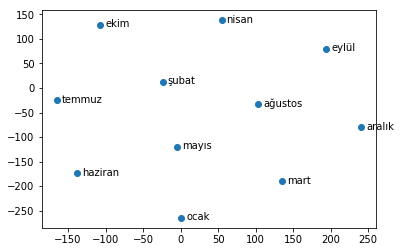

In [11]:
tsneplot(model, 'ağustos')

# CBOW

In [12]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

In [13]:
glove_input = 'glove.6B.100d.txt'
word2vec_output = 'glove.6B.100d.word2vec'
glove2word2vec(glove_input,word2vec_output)

(400000, 100)

In [14]:
model = KeyedVectors.load_word2vec_format(word2vec_output, binary=False)

In [15]:
model['istanbul']

array([ 0.40378  ,  0.019734 , -0.15499  , -0.26948  ,  0.33938  ,
        0.46476  , -0.53141  ,  0.094519 ,  0.45399  ,  1.3385   ,
        0.18271  , -0.3465   ,  0.28323  ,  0.70829  , -0.75002  ,
        0.016359 , -0.64514  , -0.54882  , -0.75309  , -0.21617  ,
        0.13678  , -0.25198  , -0.037552 ,  0.35938  , -0.33532  ,
       -0.78733  ,  0.10907  , -0.13902  ,  0.53454  ,  0.58805  ,
       -1.1348   , -0.14574  ,  0.20244  ,  0.81909  , -0.27482  ,
        0.14045  ,  0.68814  ,  0.70236  , -0.34211  , -0.62128  ,
       -0.10601  , -0.62413  ,  0.30536  , -0.44325  ,  0.64016  ,
        0.0020673,  0.88252  ,  0.050356 , -0.35739  ,  0.54686  ,
        0.11974  , -0.12593  ,  0.74211  ,  0.65482  , -1.4018   ,
       -1.1218   , -0.21188  ,  0.35338  ,  0.53459  ,  0.20205  ,
       -0.86132  ,  0.82773  , -0.10065  , -0.19766  , -0.85631  ,
        0.27891  , -1.3381   ,  0.19368  , -0.70602  ,  0.067972 ,
       -0.80953  , -0.65974  ,  0.50856  , -0.020009 , -0.7665

In [16]:
model.most_similar('kangaroo')

[('kangaroos', 0.6124688982963562),
 ('squirrel', 0.5469585657119751),
 ('rat', 0.5455619096755981),
 ('mule', 0.5324220061302185),
 ('elephant', 0.5309096574783325),
 ('snake', 0.5248682498931885),
 ('monkey', 0.521859884262085),
 ('parrot', 0.5193796157836914),
 ('sheep', 0.5146180391311646),
 ('shark', 0.5082205533981323)]

king - man + woman = queen

In [17]:
model.most_similar(positive=['woman','king'], negative=['man'], topn=1)

[('queen', 0.7698541283607483)]